In [142]:

# @DATE : 20.07.2018
# @AUTHOR : SHASWAT LENKA

#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#importing and reading data
df = pd.read_csv("./Dataset/train.csv", engine='python')
df.head()


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


# Data cleaning and Preparation
In most of the data fields replacing NaN with 0 is more meaningful. eg: v18q1,v2a1 shown above.<br>
I dont think dropping/replacing rows is of any good

### Getting number of unique households(df = idhogar)
This is important in analysis because the poverty level prediction will be measured over a particular household and not based on an individual

In [143]:
#normalize the rent amount
df["v2a1"] = (df["v2a1"] - df["v2a1"].min())/(df["v2a1"].max()-df["v2a1"].min())
df['idhogar'].unique().size

2988

**hence there are 2988 unique households in the dataset which is of our concern**

# Grouping the households with their head of family
The field parentsco1 tells us whether a person is a head of the family or not.<br>

In [144]:
df_test = df.loc[df['parentesco1'] == 1]
df_test.shape

(2973, 143)

#### Hence there are 2973 heads of the house. An interesting thing to notice here is that, the number of unique households is 15 more than number of number of family heads of house. This might be due to the same person acting as a family head in more than one house. <br>

## Performing a sample EDA to see how rent amount and  floor condition affects poverty

In [157]:
df_test.dropna(subset = ['v2a1'], inplace = False)
df_test.shape

(817, 143)

### NOTE: 
**dropping rows is never a good idea as it leads to loss of information. But here i am only considering the poverty levels of people in rented houses.**

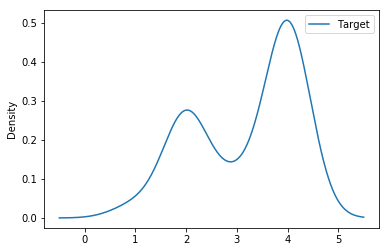

In [172]:
#case-1 : people having bad floor
df_badfloor = df_test.loc[df_test["eviv1"] == 1]
df_badfloor.plot(x = "v2a1", y = "Target", kind = "density")

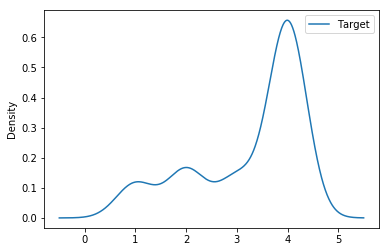

In [171]:
#case-2 : people with regular floor
df_regfloor = df_test.loc[df_test["eviv2"] == 1]
df_regfloor.plot(x = "v2a1", y = "Target", kind = "density")

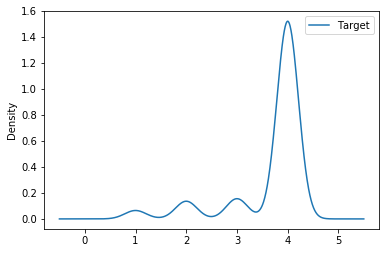

In [170]:
#case-3 : people with poor floor
df_poorfloor = df_test.loc[df_test["eviv3"] == 1]
df_poorfloor.plot(x = "v2a1", y = "Target", kind = "density")